In [47]:
import tensorflow as tf
import numpy as np

In [48]:
mnist_fashion = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist_fashion.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

training_images = training_images[:, :, :, np.newaxis]
test_images = test_images[:, :, :, np.newaxis]

In [3]:
layers = [
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu, input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)]

model = tf.keras.models.Sequential(layers)

model.compile(optimizer=tf.train.AdamOptimizer(), loss=tf.keras.losses.sparse_categorical_crossentropy)

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total para

In [5]:
model.fit(training_images, training_labels, batch_size=32, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.4366
Epoch 2/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.2892
Epoch 3/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.2446
Epoch 4/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.2101
Epoch 5/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.1862


In [6]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 35us/step


0.2530884402096272

# Visualizing the Convolutions and Pooling

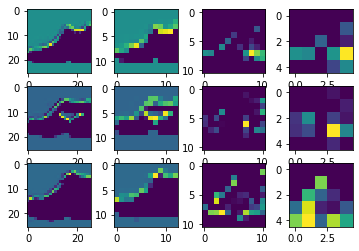

In [51]:
import matplotlib.pyplot as plt

# shoes
FIRST_IMAGE = 0
SECOND_IMAGE = 23
THIRD_IMAGE = 28

CONVOLUTION_NUMBER = 2

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

fig, ax = plt.subplots(nrows=3, ncols=4)
for layer_num in range(0, 4):
    activation = activation_model.predict(test_images[FIRST_IMAGE][np.newaxis, :, :, :])[layer_num]
    ax[0, layer_num].imshow(activation[0, :, :, CONVOLUTION_NUMBER])
    ax[0, layer_num].grid(False)
    activation = activation_model.predict(test_images[SECOND_IMAGE][np.newaxis, :, :, :])[layer_num]
    ax[1, layer_num].imshow(activation[0, :, :, CONVOLUTION_NUMBER])
    ax[1, layer_num].grid(False)
    activation = activation_model.predict(test_images[THIRD_IMAGE][np.newaxis, :, :, :])[layer_num]
    ax[2, layer_num].imshow(activation[0, :, :, CONVOLUTION_NUMBER])
    ax[2, layer_num].grid(False)

Well Done